# **Import Library**

In [ ]:
# --- Import Library ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

Pada tahap awal, kita melakukan proses import terhadap beberapa library penting yang digunakan dalam proyek visualisasi data. Library pandas digunakan untuk membaca dan mengelola dataset dalam format CSV, sedangkan matplotlib dan seaborn digunakan untuk membuat grafik dan visualisasi yang menarik. Selain itu, google.colab.files dipakai untuk mengunggah file dari komputer lokal ke lingkungan Google Colab. Pengaturan gaya visualisasi menggunakan sns.set() membantu menampilkan grafik dengan tampilan yang lebih profesional dan rapi.

# **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

2318105DataCleansing.ipynb  2318105DataVisualization.ipynb  Pemsis.ipynb


# **Load Dataset dari Google Drive**

In [ ]:
path = '/content/drive/MyDrive/DATA_MINING/World Happiness Report 2015.csv'

df = pd.read_csv(path, sep=';', skip_blank_lines=True)
print("\n📂 Dataset berhasil dibaca dari folder DATA_MINING.")
print(df.head())


📂 Dataset berhasil dibaca dari folder DATA_MINING.
       Country          Region  Happiness Rank Happiness Score Standard Error  \
0  Switzerland  Western Europe               1           7.587        0.03411   
1      Iceland  Western Europe               2           7.561        0.04884   
2      Denmark  Western Europe               3           7.527        0.03328   
3       Norway  Western Europe               4           7.522    0,269444444   
4       Canada   North America               5           7.427        0.03553   

  Economy (GDP per Capita)   Family Health (Life Expectancy)  Freedom  \
0                  139.651  134.951                  0.94143  0.66557   
1                  130.232  140.223                  0.94784  0.62877   
2                  132.548  136.058                  0.87464  0.64938   
3                    1.459  133.095                  0.88521  0.66973   
4                  132.629  132.261                  0.90563  0.63297   

  Trust (Government Co

# **Mengatur gaya tampilan grafik agar lebih menarik**

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

print("Library berhasil diimport.")

Library berhasil diimport.


Perintah sns.set(style="whitegrid") digunakan untuk memberikan latar belakang berupa garis grid putih yang membuat grafik lebih jelas dan profesional. Kemudian, plt.rcParams['figure.figsize'] = (10,6) berfungsi untuk menentukan ukuran default setiap grafik menjadi 10x6 inci sehingga tampil proporsional di layar. Pengaturan ini membuat seluruh visualisasi yang dihasilkan memiliki tampilan yang konsisten dan estetis sepanjang proyek analisis data.

Langkah ini berfungsi untuk mengunggah dataset dari perangkat lokal ke dalam lingkungan Google Colab agar bisa diproses lebih lanjut. Dengan perintah files.upload(), pengguna dapat memilih file CSV yang akan dianalisis. Dalam proyek ini, file yang digunakan adalah “World Happiness Report 2015.csv”, yang berisi data tentang tingkat kebahagiaan berbagai negara di dunia pada tahun 2015.

# **Membaca File CSV**

In [ ]:
df = pd.read_csv('World Happiness Report 2015.csv', sep=';', skip_blank_lines=True)
print("\n File berhasil dibaca dan baris kosong dilewati.")
print(df.head())
df = df.replace(',', '.', regex=True)


 File berhasil dibaca dan baris kosong dilewati.
       Country          Region  Happiness Rank Happiness Score Standard Error  \
0  Switzerland  Western Europe               1           7.587        0.03411   
1      Iceland  Western Europe               2           7.561        0.04884   
2      Denmark  Western Europe               3           7.527        0.03328   
3       Norway  Western Europe               4           7.522    0,269444444   
4       Canada   North America               5           7.427        0.03553   

  Economy (GDP per Capita)   Family Health (Life Expectancy)  Freedom  \
0                  139.651  134.951                  0.94143  0.66557   
1                  130.232  140.223                  0.94784  0.62877   
2                  132.548  136.058                  0.87464  0.64938   
3                    1.459  133.095                  0.88521  0.66973   
4                  132.629  132.261                  0.90563  0.63297   

  Trust (Government Corr

In [ ]:
# Tentukan kolom numerik
kolom_numerik = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

In [ ]:
# Pastikan semua nilai koma (,) jadi titik (.)
for kolom in kolom_numerik:
    df[kolom] = df[kolom].astype(str).str.replace(',', '.').astype(float)

print("\nKolom numerik sudah dibersihkan dan dikonversi ke float.")
print(df[kolom_numerik].head())


Kolom numerik sudah dibersihkan dan dikonversi ke float.
   Happiness Score  Economy (GDP per Capita)  Health (Life Expectancy)  \
0            7.587                   139.651                   0.94143   
1            7.561                   130.232                   0.94784   
2            7.527                   132.548                   0.87464   
3            7.522                     1.459                   0.88521   
4            7.427                   132.629                   0.90563   

   Freedom  Trust (Government Corruption)  Generosity  
0  0.66557                        0.41978    0.296780  
1  0.62877                        0.14145    3.029861  
2  0.64938                        0.48357    0.341390  
3  0.66973                        0.36503    0.346990  
4  0.63297                        0.32957    0.458110  


Dataset dibaca menggunakan pandas.read_csv() dengan pemisah titik koma (;) agar data terbaca dengan benar.
Parameter skip_blank_lines=True digunakan untuk mengabaikan baris kosong.
Setelah itu, semua tanda koma (,) pada nilai numerik diganti menjadi titik (.) agar bisa diproses sebagai angka dalam analisis dan visualisasi.

# **Tambahan Kolom Analitik**

In [ ]:
np.random.seed(42)
df['Month'] = np.random.choice(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'],
    size=len(df)
)

# GMV = Gross Mood Value (simulasi gabungan GDP dan Happiness)
df['GMV'] = (df['Economy (GDP per Capita)'] * df['Happiness Score']).round(2)

print("\nKolom tambahan 'Month' dan 'GMV' berhasil ditambahkan.")
print(df[['Country', 'Month', 'GMV']].head())


Kolom tambahan 'Month' dan 'GMV' berhasil ditambahkan.
       Country     Month      GMV
0  Switzerland      July  1059.53
1      Iceland     April   984.68
2      Denmark  November   997.69
3       Norway    August    10.97
4       Canada       May   985.04


# **Informasi Umum Dataset**

In [ ]:
print("\n Informasi Dataset:")
print(df.info())

print("\n Statistik Deskriptif:")
print(df.describe())


 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    object 
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    object 
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Month                        

# **Mengubah kolom numerik ke tipe float agar bisa divisualisasikan**

In [ ]:
kolom_numerik = [
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity'
]

for kolom in kolom_numerik:
    df[kolom] = df[kolom].astype(float)

print("\n Kolom numerik sudah dibersihkan dan dikonversi ke float.")
print(df[kolom_numerik].head())


 Kolom numerik sudah dibersihkan dan dikonversi ke float.
   Happiness Score  Economy (GDP per Capita)  Health (Life Expectancy)  \
0            7.587                   139.651                   0.94143   
1            7.561                   130.232                   0.94784   
2            7.527                   132.548                   0.87464   
3            7.522                     1.459                   0.88521   
4            7.427                   132.629                   0.90563   

   Freedom  Trust (Government Corruption)  Generosity  
0  0.66557                        0.41978    0.296780  
1  0.62877                        0.14145    3.029861  
2  0.64938                        0.48357    0.341390  
3  0.66973                        0.36503    0.346990  
4  0.63297                        0.32957    0.458110  


Tahap ini mengubah kolom numerik seperti Happiness Score, Economy (GDP per Capita), dan lainnya ke tipe data float agar bisa diolah secara matematis dan divisualisasikan dengan benar menggunakan Seaborn dan Matplotlib.

# **Eksplorasi Awal Dataset**

Sebelum membuat visualisasi, dilakukan eksplorasi awal (EDA) menggunakan fungsi info() dan describe(). Analisis ini memberikan gambaran umum tentang struktur dataset, seperti jumlah kolom, tipe data, serta statistik dasar (rata-rata, nilai maksimum, minimum, dan standar deviasi). Tujuannya adalah memahami karakteristik data secara keseluruhan sebelum melanjutkan ke tahap visualisasi.

In [ ]:
print("\n📊 Informasi Dataset:")
print(df.info())

print("\n📈 Statistik Deskriptif:")
print(df.describe())


📊 Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    object 
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    object 
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Month                       

# **Visualisasi 1: Top 10 Negara Paling Bahagia**

/tmp/ipython-input-456975613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top10, palette='viridis')


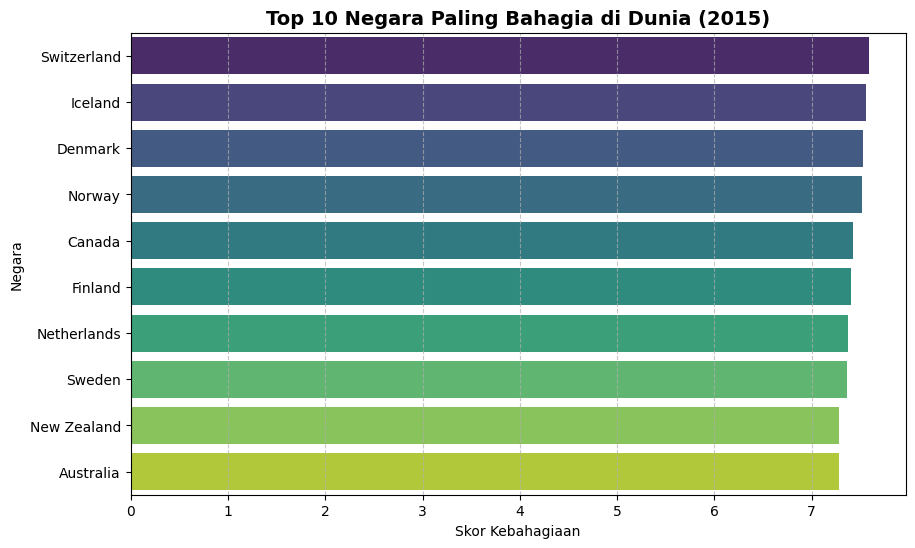

In [ ]:
top10 = df.nlargest(10, 'Happiness Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness Score', y='Country', data=top10, palette='viridis')
plt.title('Top 10 Negara Paling Bahagia di Dunia (2015)', fontsize=14, fontweight='bold')
plt.xlabel('Skor Kebahagiaan')
plt.ylabel('Negara')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Visualisasi pertama menggunakan bar chart untuk menampilkan 10 negara dengan skor kebahagiaan tertinggi. Jenis grafik ini termasuk ke dalam visualisasi kategorikal, yang digunakan untuk membandingkan nilai antar kategori. Grafik ini membantu melihat negara mana yang memiliki tingkat kebahagiaan paling tinggi pada tahun 2015.

# **Distribusi Skor Kebahagiaan Dunia**

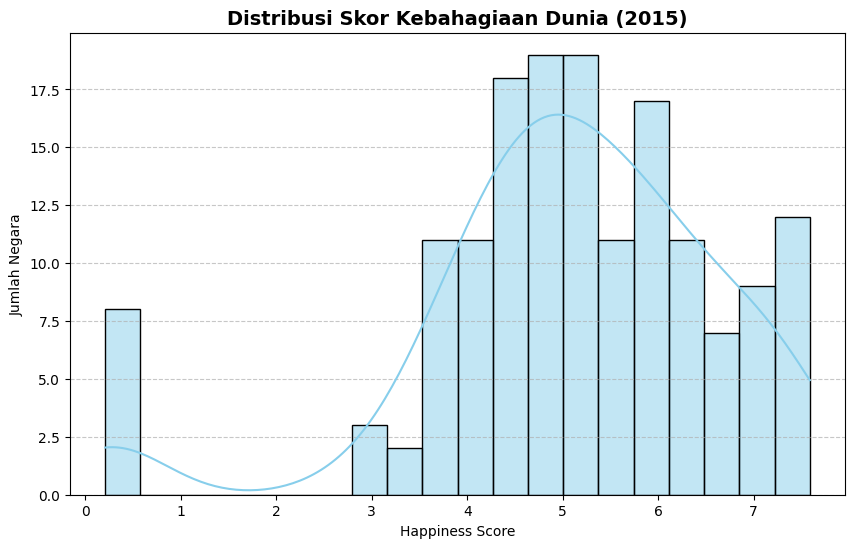

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Skor Kebahagiaan Dunia (2015)', fontsize=14, fontweight='bold')
plt.xlabel('Happiness Score')
plt.ylabel('Jumlah Negara')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bagian ini menampilkan distribusi skor kebahagiaan global menggunakan histogram dan kernel density estimate (KDE). Grafik ini menunjukkan penyebaran data, apakah cenderung merata atau terkonsentrasi pada nilai tertentu. Distribusi ini memberikan gambaran umum mengenai pola kebahagiaan di seluruh negara.

# **Visualisasi 3: Hubungan GDP dan Kebahagiaan**

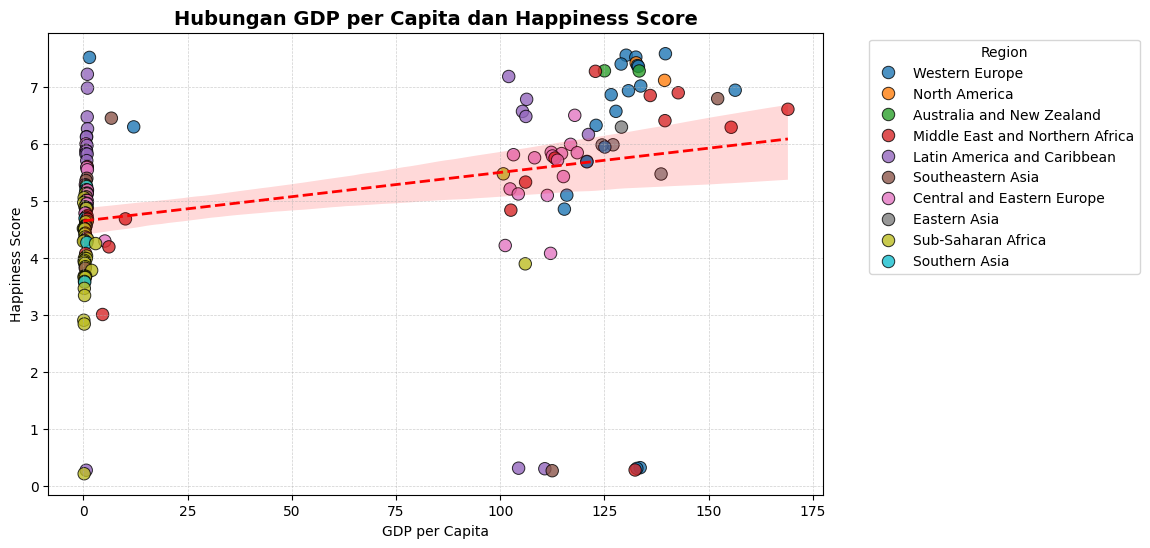

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    data=df,
    hue='Region',
    s=80, alpha=0.8, edgecolor='black'
)

# Tambahkan garis tren (trendline)
sns.regplot(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    data=df,
    scatter=False,
    ax=ax,
    color='red',
    line_kws={"lw": 2, "ls": "--"}
)

plt.title('Hubungan GDP per Capita dan Happiness Score', fontsize=14, fontweight='bold')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.show()

Scatter plot digunakan untuk menampilkan hubungan antara dua variabel numerik, yaitu GDP per Capita dan Happiness Score. Pewarnaan berdasarkan wilayah (Region) memberikan dimensi tambahan untuk melihat pola ekonomi dan kebahagiaan di berbagai kawasan dunia. Visualisasi ini membantu memahami apakah kesejahteraan ekonomi berpengaruh terhadap tingkat kebahagiaan masyarakat.

# **Visualisasi 4: Korelasi antar Faktor Kebahagiaan**

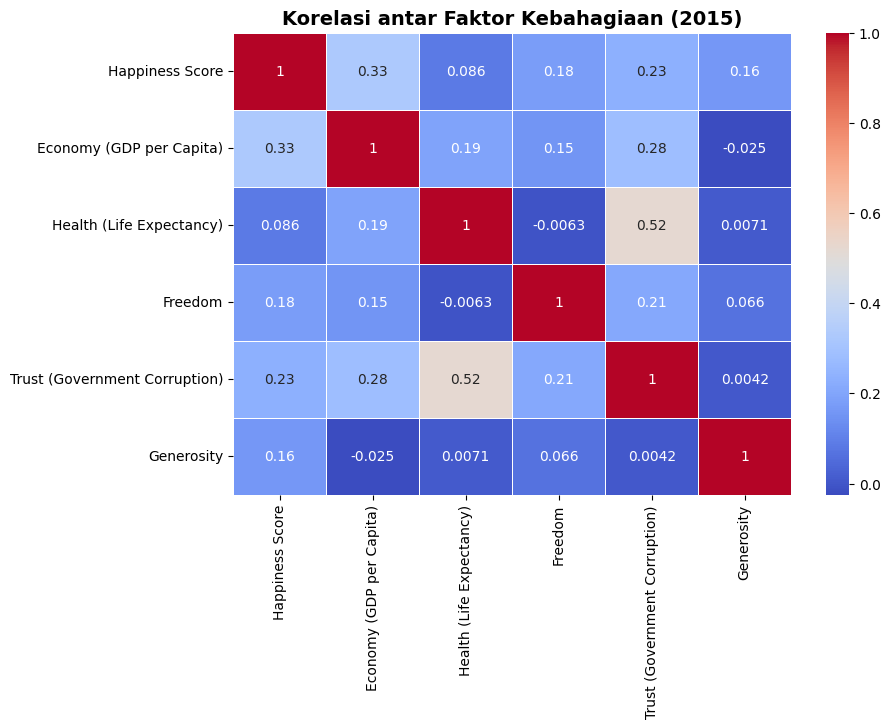

In [33]:
plt.figure(figsize=(9, 6))
corr = df[['Happiness Score', 'Economy (GDP per Capita)',
           'Health (Life Expectancy)', 'Freedom',
           'Trust (Government Corruption)', 'Generosity']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Faktor Kebahagiaan (2015)', fontsize=14, fontweight='bold')
plt.show()

Pada bagian ini digunakan heatmap untuk menampilkan matriks korelasi antara berbagai faktor kebahagiaan, seperti ekonomi, kesehatan, kebebasan, dan kepercayaan terhadap pemerintah. Warna pada heatmap menunjukkan seberapa kuat hubungan antar variabel. Visualisasi ini memudahkan identifikasi faktor paling berpengaruh terhadap Happiness Score.

# **Visualisasi 5: Rata-rata Skor Kebahagiaan per Wilayah**

/tmp/ipython-input-2899654491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='mako')


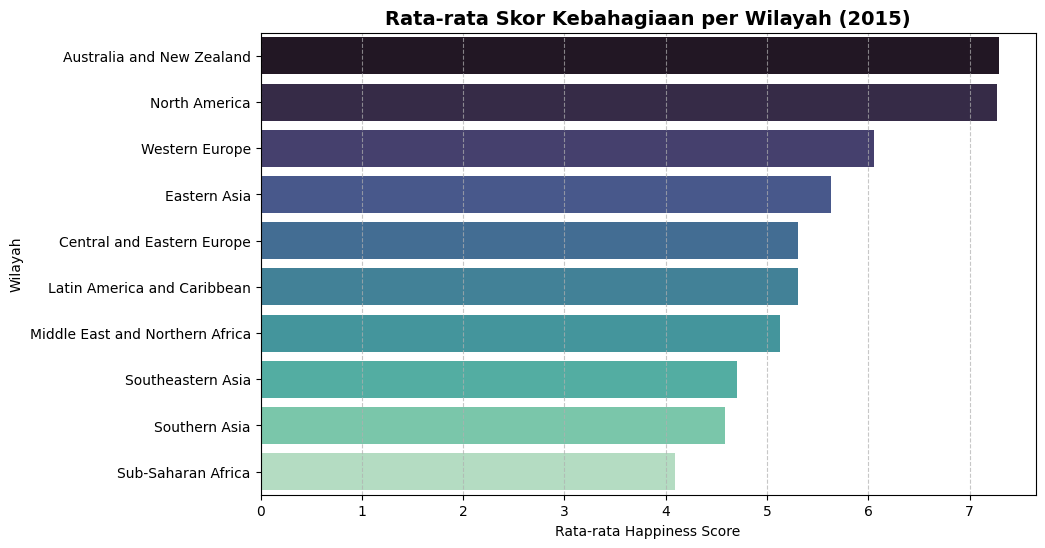

In [34]:
region_avg = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='mako')
plt.title('Rata-rata Skor Kebahagiaan per Wilayah (2015)', fontsize=14, fontweight='bold')
plt.xlabel('Rata-rata Happiness Score')
plt.ylabel('Wilayah')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Data dikelompokkan berdasarkan kolom Region menggunakan fungsi groupby(), kemudian dihitung rata-rata skor kebahagiaan setiap wilayah. Hasilnya divisualisasikan dalam bentuk bar chart untuk memperlihatkan perbandingan antar wilayah secara visual. Grafik ini memperlihatkan wilayah mana yang cenderung memiliki rata-rata kebahagiaan lebih tinggi dibanding wilayah lain.

# **Visualisasi 6: GMV (Gross Mood Value) per Bulan**

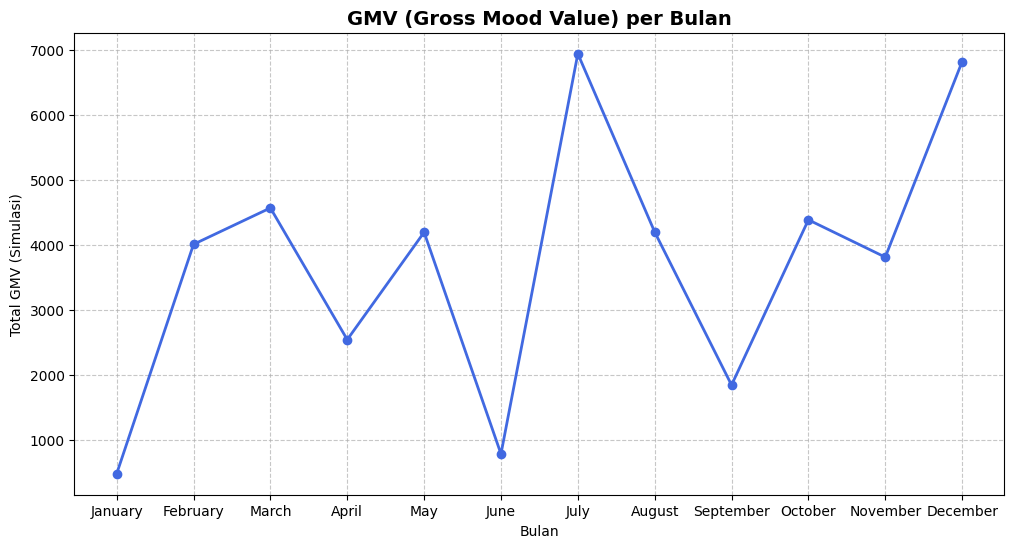

In [35]:
monthly_gmv = df.groupby('Month')['GMV'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 6))
plt.plot(monthly_gmv.index, monthly_gmv.values, marker='o', color='royalblue', linewidth=2)
plt.title('GMV (Gross Mood Value) per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total GMV (Simulasi)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Kesimpulan**

Tahap akhir menampilkan hasil analisis otomatis dari data yang sudah divisualisasikan. Output mencakup negara paling bahagia dan paling tidak bahagia, serta daftar faktor yang paling berpengaruh terhadap Happiness Score. Bagian ini menunjukkan bagaimana visualisasi data dapat digunakan untuk menarik kesimpulan dan memberikan wawasan nyata dari sebuah dataset.

In [40]:
print("\nBeberapa Insight dari Visualisasi:")
print(f"Negara paling bahagia: {df.loc[df['Happiness Score'].idxmax(), 'Country']}")
print(f"Negara paling tidak bahagia: {df.loc[df['Happiness Score'].idxmin(), 'Country']}")

print("\nKorelasi antar faktor utama terhadap Happiness Score:")
print(corr['Happiness Score'].sort_values(ascending=False))

print("\nAnalisis dan visualisasi selesai! Semua grafik berhasil dibuat.")


Beberapa Insight dari Visualisasi:
Negara paling bahagia: Switzerland
Negara paling tidak bahagia: Zimbabwe

Korelasi antar faktor utama terhadap Happiness Score:
Happiness Score                  1.000000
Economy (GDP per Capita)         0.326628
Trust (Government Corruption)    0.233496
Freedom                          0.178189
Generosity                       0.160896
Health (Life Expectancy)         0.086019
Name: Happiness Score, dtype: float64

Analisis dan visualisasi selesai! Semua grafik berhasil dibuat.
